In [471]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Train and Test Datasets

In [472]:
#Load Datasets
df1 = pd.read_csv('/content/Test.csv')
df2 = pd.read_csv('/content/Train.csv')

### Merge Both Datasets

In [473]:
#Merge Two data sets
df = pd.concat([df2, df1])
df.shape

(14204, 12)

# `The Dataset `

In [474]:
#Display five rows of data set
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data Structure and Content

In [475]:
#Check insights of datasets
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [476]:
df.shape

(14204, 12)

In [477]:
#Check Data Types of Attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [478]:
#Check null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## Exploratory Data Analysis

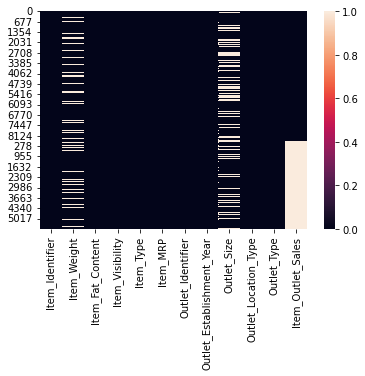

In [479]:
#Check null values by ploting
sns.heatmap(df.isnull())

# Missing Value Treatment

In [480]:
	#Take mean to fulfill the null values which was in Continuous form
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].median())

In [481]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [482]:
print(df.isnull().sum())
df.shape

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


(14204, 12)

In [483]:
df['Outlet_Size'].value_counts()
print(df['Outlet_Size'].unique())

['Medium' 'High' 'Small']


In [484]:
#Check Duplicates
counter = df.duplicated().sum()
print("No of Duplicates = ",counter)

No of Duplicates =  0


# Univariate Analysis

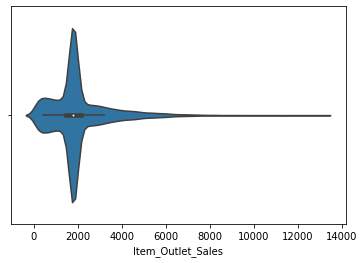

In [485]:
#Univariate Analysis
sns.violinplot(x='Item_Outlet_Sales', data=df )
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


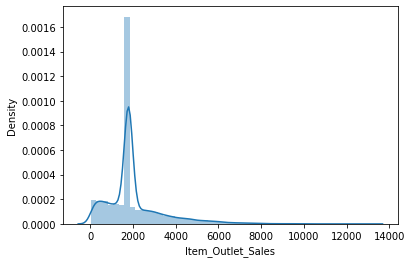

In [486]:
sns.distplot(df['Item_Outlet_Sales'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


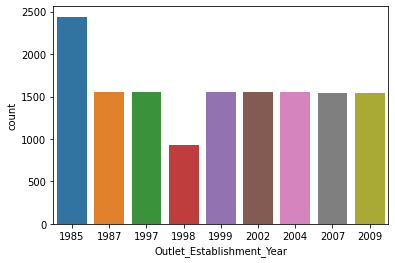

In [487]:
sns.countplot(df['Outlet_Establishment_Year'])

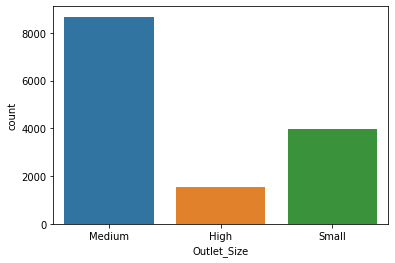

In [488]:
sns.countplot(x='Outlet_Size',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


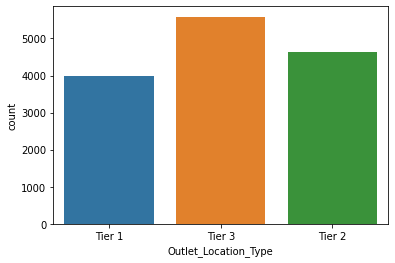

In [489]:
sns.countplot(df['Outlet_Location_Type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


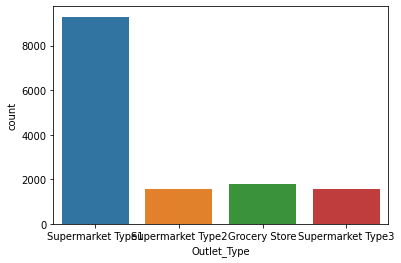

In [490]:
sns.countplot(df['Outlet_Type'])

# Bivariate Analysis

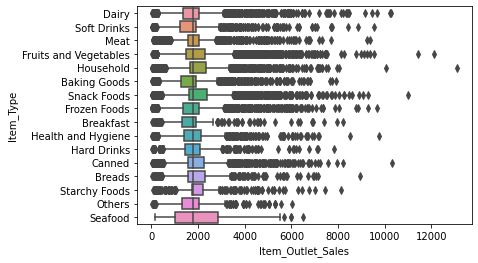

In [491]:
#Bivariate Analysis

sns.boxplot( x="Item_Outlet_Sales", y='Item_Type', data=df, )
plt.show()

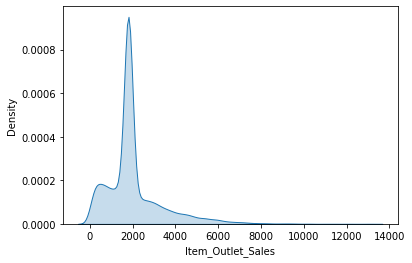

In [492]:
sns.kdeplot(data = df['Item_Outlet_Sales'], shade = True)

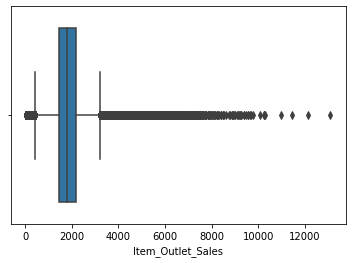

In [493]:
#Detecting Outliers by Box ploting
sns.boxplot(x='Item_Outlet_Sales', data=df )
plt.show()

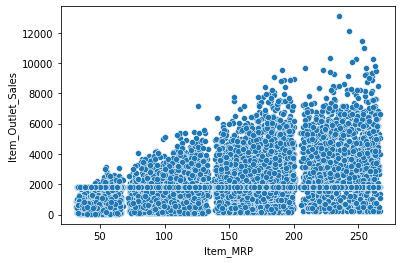

In [494]:
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'])
plt.show()

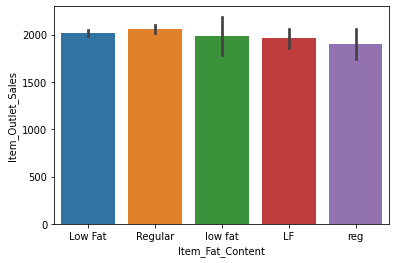

In [495]:
sns.barplot(x = df['Item_Fat_Content'],y = df['Item_Outlet_Sales'])

In [496]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013641,0.033002,0.000462,0.010686
Item_Visibility,-0.013641,1.000000,-0.006351,-0.083678,-0.098285
Item_MRP,0.033002,-0.006351,1.000000,0.000141,0.436478
Outlet_Establishment_Year,0.000462,-0.083678,0.000141,1.000000,-0.037651
Item_Outlet_Sales,0.010686,-0.098285,0.436478,-0.037651,1.000000


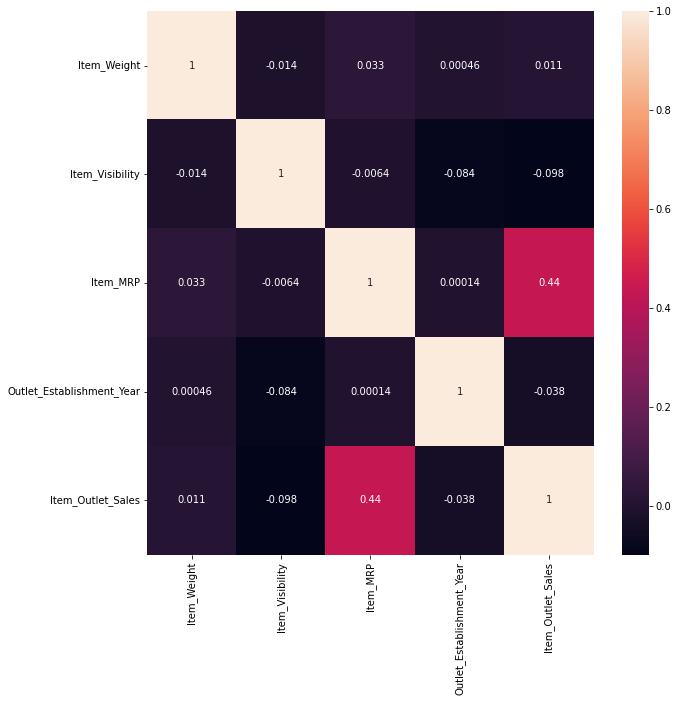

In [497]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


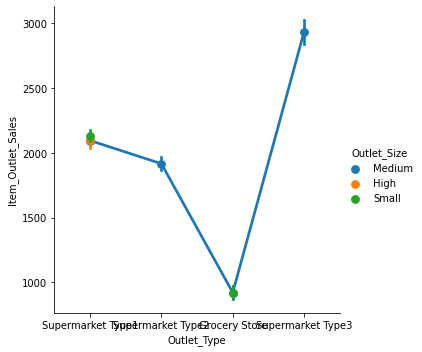

In [498]:

sns.factorplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df)

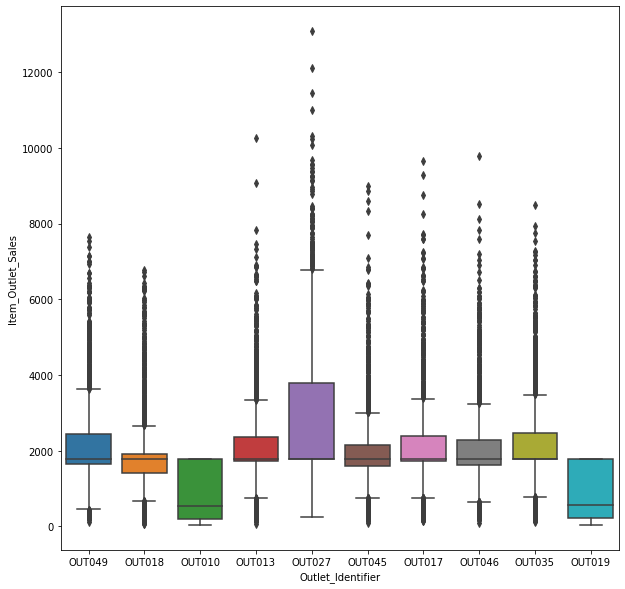

In [499]:
plt.figure(figsize = (10,10))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

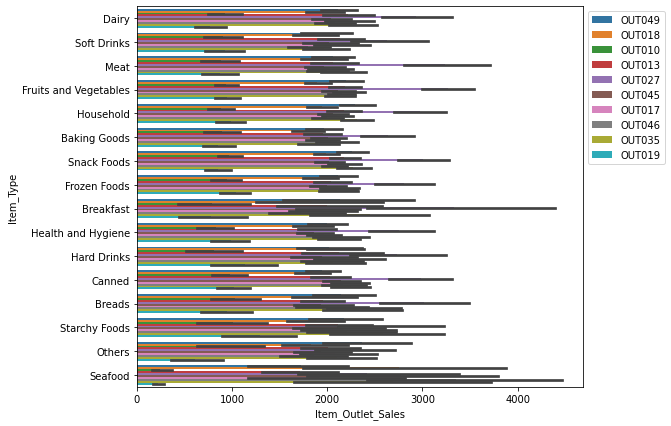

In [500]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot( x="Item_Outlet_Sales", y='Item_Type', data=df,
                hue='Outlet_Identifier',ax=ax)
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

## Feature Engineering
### Label Encoding

In [501]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## One Hot Encoding

In [502]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,9,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,3,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,9,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,732.3800,0,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,994.7052,1,0,...,1,0,0,0,0,1,0,1,0,0


# PreProcessing Data


In [503]:
x=df.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [504]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.016047,249.8092,9,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,3,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,9,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [505]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [506]:
df = df.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

## Modeling

In [507]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix

### Seperating Training And Test Data

In [508]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Standard Scaling 06m Robust Scaling

In [509]:
from sklearn.preprocessing import RobustScaler

In [510]:
robust_scaler = RobustScaler()

In [511]:
# calculate median and IQR  
robust_scaler.fit(df)

RobustScaler()

In [512]:
robust_scaled_data = robust_scaler.transform(df)

In [513]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
# combine both fit & transform into one call
standard_scaled_data = standard_scaler.fit_transform(df)

# dataframe with both standard and robust scaled values
scaled_values = pd.DataFrame({
    'Standard': standard_scaled_data.reshape(-1),
    'Robust': robust_scaled_data.reshape(-1)
})

### Linear Regression

In [514]:
from sklearn.linear_model import LinearRegression

In [515]:
lrm=LinearRegression()

In [516]:
lrm.fit(x_train,y_train)

LinearRegression()

In [517]:
predicted=lrm.predict(x_test)

In [518]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
rsme_lrm = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_lrm)
print("SCORE",lrm.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1238245.032051378
MEAN ABSOLUTE ERROR(MAE) 799.4207670651545
ROOT MEAN SQUARED ERROR(RMSE) 1.2316408124800309
SCORE 0.3297238642930299


### Random Forest

In [519]:
from sklearn.ensemble import RandomForestRegressor

In [520]:
rfg=RandomForestRegressor()

In [521]:
rfg.fit(x_train,y_train)

RandomForestRegressor()

In [522]:
predicted=rfg.predict(x_test)

In [523]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
rsme_rfg = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_rfg)
print("SCORE",rfg.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1374038.5675522813
MEAN ABSOLUTE ERROR(MAE) 844.1385351115807
ROOT MEAN SQUARED ERROR(RMSE) 2.1214497131445644
SCORE 0.2562172772496376


### ADA Boost

In [524]:
from sklearn.ensemble import AdaBoostRegressor

In [525]:
abr=AdaBoostRegressor(n_estimators=70)


In [526]:
abr.fit(x_train,y_train)

AdaBoostRegressor(n_estimators=70)

In [527]:
predicted=abr.predict(x_test)

In [528]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
rsme_abr = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_abr)
print("SCORE",abr.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1441792.8933852767
MEAN ABSOLUTE ERROR(MAE) 915.6638306663108
ROOT MEAN SQUARED ERROR(RMSE) 2.8996322798987824
SCORE 0.21954108915984216


### XG Boost

In [529]:
import xgboost 

In [530]:
from xgboost import XGBRegressor

In [531]:
xgb = XGBRegressor()

In [532]:
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [533]:
xgb.fit(x_train,y_train)


[13:57:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1000,
             subsample=0.7)

In [534]:
predicted=xgb.predict(x_test)

In [535]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
rsme_xgb = np.sqrt(np.mean(np.square(((y_test- predicted) / y_test)), axis=0))
print("ROOT MEAN SQUARED ERROR(RMSE)",rsme_xgb)
print("SCORE",xgb.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1476041.4804861858
MEAN ABSOLUTE ERROR(MAE) 864.2570924109197
ROOT MEAN SQUARED ERROR(RMSE) 2.332660805430778
SCORE 0.201001938974527


## Final Predictions

In [536]:
model = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest','Ada Boost','XGBoost'],'RMSE_mean'    : [rsme_lrm,rsme_rfg,rsme_abr,rsme_xgb]})

### Visualize Predictions

Plotting based on Model and RSME


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


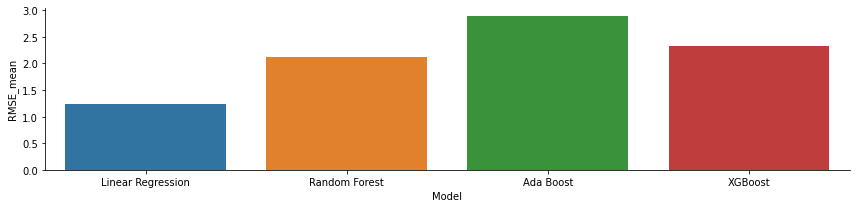

In [537]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', kind='bar',data= model, size=3, aspect=4)
print('Plotting based on Model and RSME')